In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Esta llave se debe pedir directamente con census.gov
API_KEY = "17e47fbc1d67e71f5a4d26351e5bd1dc5d08ebd8"

# Por constitucion cada 10 años se realiza el censo... por lo tanto sólo podemos accder al 2020 y no 2024.
pop_url = "https://api.census.gov/data/2020/dec/pl"
params = {
    "get": "NAME,P1_001N",  # NAME = state name, P1_001N = total population
    "for": "state:*",
    "key": API_KEY
}

response = requests.get(pop_url, params=params)



try:
    data = response.json()
except ValueError as e:
    print("Error decoding JSON:", e)
    exit()

# Convertir a un data frame
columns = data[0]
rows = data[1:]
df = pd.DataFrame(rows, columns=columns)
df["P1_001N"] = df["P1_001N"].astype(int)

# 3. Crear diccionario de manera manual (en millas cuadradas) para cada estado
# Fuente: https://data.census.gov/table?q=table%20of%20each%20state%20in%20square%20miles
land_area_sq_mi = {
    'Alabama': 50645, 'Alaska': 571052, 'Arizona': 113655, 'Arkansas': 51993,
    'California': 155859, 'Colorado': 103638, 'Connecticut': 4842, 'Delaware': 1949,
    'Florida': 53654, 'Georgia': 57717, 'Hawaii': 6423, 'Idaho': 82645,
    'Illinois': 55513, 'Indiana': 35825, 'Iowa': 55853, 'Kansas': 81759,
    'Kentucky': 39485, 'Louisiana': 43216, 'Maine': 30845, 'Maryland': 9711,
    'Massachusetts': 7801, 'Michigan': 56610, 'Minnesota': 79631, 'Mississippi': 46924,
    'Missouri': 68746, 'Montana': 145550, 'Nebraska': 76814, 'Nevada': 109860,
    'New Hampshire': 8953, 'New Jersey': 7354, 'New Mexico': 121312, 'New York': 47123,
    'North Carolina': 48624, 'North Dakota': 68994, 'Ohio': 40858, 'Oklahoma': 68596,
    'Oregon': 95996, 'Pennsylvania': 44742, 'Rhode Island': 1034, 'South Carolina': 30064,
    'South Dakota': 75807, 'Tennessee': 41233, 'Texas': 261270, 'Utah': 82596,
    'Vermont': 9217, 'Virginia': 39482, 'Washington': 66455, 'West Virginia': 24041,
    'Wisconsin': 54167, 'Wyoming': 97088, 'District of Columbia': 61
}

# Mapear el area al data frame
df["land_area"] = df["NAME"].map(land_area_sq_mi)

# Se calcula la densidad
df["density"] = df["P1_001N"] / df["land_area"]

# 6. Sort and find the most dense
sort_desc_density = df.sort_values("density", ascending=False).head()

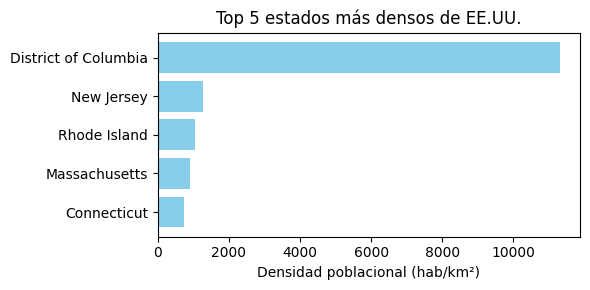

In [12]:
plt.figure(figsize=(6, 3))
plt.barh(sort_desc_density["NAME"], sort_desc_density["density"], color="skyblue")
plt.xlabel("Densidad poblacional (hab/km²)")
plt.title("Top 5 estados más densos de EE.UU.")
plt.gca().invert_yaxis()  # Para que el estado más denso quede arriba
plt.tight_layout()
plt.show()